In [ ]:
!pip install gdown
!gdown --id 1LhRuYh2Ab4Ap_69Xdg8MIBH2moHK1Ypa

Downloading...
From: https://drive.google.com/uc?id=1LhRuYh2Ab4Ap_69Xdg8MIBH2moHK1Ypa
To: /content/data.csv
100% 12.1k/12.1k [00:00<00:00, 17.1MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
data = pd.read_csv("data.csv") 
data.sample(5) 

,age,interest,success
154,18.767324,59.717665,1.0
151,8.395444,15.224779,0.0
58,33.895835,29.425013,0.0
190,7.665506,8.339753,0.0
38,12.617491,18.069521,0.0


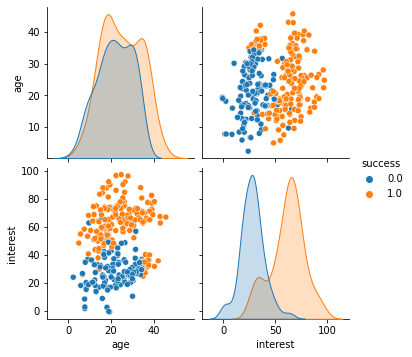

In [ ]:
sns.pairplot( data=data, vars=('age','interest'), hue='success' )

In [ ]:
data.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [ ]:
df_norm = data[['age', 'interest']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,age,interest
91,0.494112,0.269231
256,0.124952,0.024705
140,0.558343,0.657283
70,0.747358,0.346702
21,0.674970,0.754770


In [ ]:
df_norm.describe()

,age,interest
count,297.000000,297.000000
mean,0.491919,0.488015
std,0.204117,0.223981
min,0.000000,0.000000
25%,0.337460,0.301361
50%,0.482108,0.474850
75%,0.651994,0.673527
max,1.000000,1.000000


In [ ]:
target = data[["success"]]
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,age,interest,success
144,0.736908,0.371563,0.0
41,0.393285,0.639782,1.0
14,0.549676,0.380024,0.0
207,0.875637,0.332043,1.0
183,0.461491,0.885559,1.0


In [ ]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['age','interest']]# taking the training data features
trainY=train.success# output of our training data
testX= test[['age','interest']] # taking test data features
testY =test.success   #output value of test data
trainX.head(5)

,age,interest
62,0.536661,0.584317
263,0.272454,0.444194
183,0.461491,0.885559
175,0.154503,0.551606
20,0.622513,0.266615


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Dense(1))
# Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
model.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:
#model.fit(trainX,trainY,epochs=1000)
model.set_weights(w)

In [ ]:
prediction = np.rint(model.predict(testX))
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.8777777777777778


In [ ]:
w = model.get_weights()

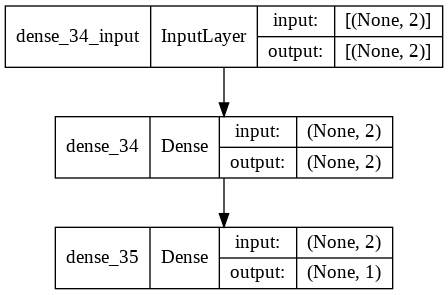

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
w

[array([[-1.115022  ,  0.29609752],
        [-4.4045763 ,  5.2353883 ]], dtype=float32),
 array([ 2.2039154, -2.266368 ], dtype=float32),
 array([[-4.739885 ],
        [ 4.5700326]], dtype=float32),
 array([-0.36092335], dtype=float32)]

In [ ]:
def weight_to_chromosome(w):
  return (*w[0][0],*w[0][1],*w[1],*w[2][0],*w[2][1],*w[3])

c = weight_to_chromosome(w)

def chromosome_to_weight(c):
  return [
          np.array([list(c[:2]),list(c[2:4])]),
          np.array(list(c[4:6])),
          np.array([[c[6]],[c[7]]]),
          np.array(list(c[8:]))
        ]

w = chromosome_to_weight(c)
  

In [ ]:
!pip install pyeasyga

  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6804 sha256=d9d2c7a5e8e3bff39423f97685a5eee07230a3fb40fb524bd61d49cbbf63134d
  Stored in directory: /root/.cache/pip/wheels/58/fa/2a/493c9d613e1048d4338ce44436a2e1c056b9ffcc75fb79add5
Successfully built pyeasyga


In [ ]:
from pyeasyga import pyeasyga

In [ ]:
ga = pyeasyga.GeneticAlgorithm(data,
                               population_size=10,
                               generations=20,
                               crossover_probability=0.8,
                               mutation_probability=0.05,
                               elitism=True,
                               maximise_fitness=True)

In [ ]:
def create_individual(data):
    return np.random.rand(9) * 10 - 5
  
ga.create_individual = create_individual

In [ ]:
def crossover(parent_1, parent_2):
    index = np.random.randint(1,len(parent_1))
    child_1 = np.concatenate((parent_1[:index], parent_2[index:]), axis=0)
    child_2 = np.concatenate((parent_2[:index], parent_1[index:]), axis=0)
    return child_1, child_2

ga.crossover_function = crossover

In [ ]:
def mutate(individual):
    mutate_index = np.random.randint(len(individual))
    individual[mutate_index] = np.random.rand(1)[0] * 10 - 5
    
ga.mutate_function = mutate

In [ ]:
def fitness (individual, data=None):
    global model,testX,testY
    w = chromosome_to_weight(individual)
    model.set_weights(w)
    prediction = np.rint(model.predict(testX))
    return metrics.accuracy_score(prediction,testY)

ga.fitness_function = fitness

In [ ]:
ga.run()

In [ ]:
ga.best_individual()[0]

0.9